In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_data['sex'] = insurance_data['sex'].astype('category')
insurance_data['sex'] = insurance_data['sex'].cat.codes
insurance_data['smoker'] = insurance_data['smoker'].astype('category')
insurance_data['smoker'] = insurance_data['smoker'].cat.codes
insurance_data['region'] = insurance_data['region'].astype('category')
insurance_data['region'] = insurance_data['region'].cat.codes

In [5]:
insurance_data.isnull().sum()
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [6]:
y = insurance_data['charges']
x = insurance_data.drop(columns = 'charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
c = lr.intercept_
c

-11827.733141795681

In [12]:
m = lr.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [15]:
y_pred_train = lr.predict(x_train)

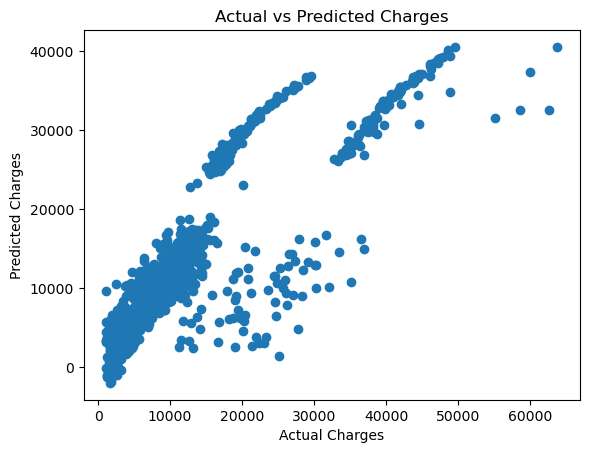

In [16]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

In [17]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.7306840408360218

In [19]:
y_pred_test = lr.predict(x_test)

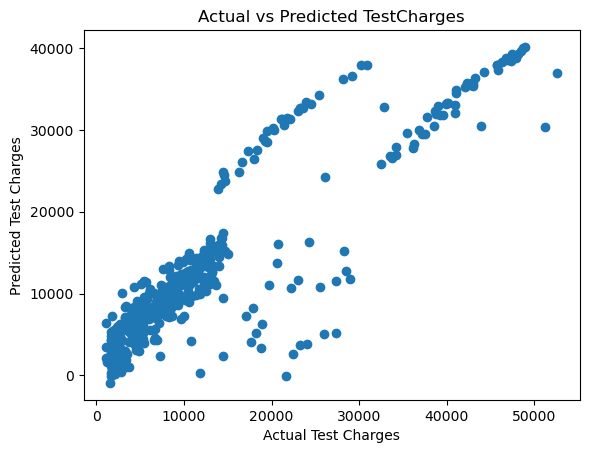

In [20]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Test Charges")
plt.ylabel("Predicted Test Charges")
plt.title("Actual vs Predicted TestCharges")
plt.show()

In [21]:
r2_score(y_test, y_pred_test)

0.7911113876316933